# Stock Analysis and Prediction with Stocker

## Introduction
This tutorial will introduce how to use Stocker, a Python tool to do stock analysis and prediction. 


## Installing the libraries

Before getting started, you'll need to install the various libraries that we will use.

    quandl 3.3.0
    matplotlib 2.1.1
    numpy 1.14.0
    fbprophet 0.2.1
    pystan 2.17.0.0
    pandas 0.22.0
    pytrends 4.3.0

These except pytrends and fbprophet can be installed with `conda`:

    $ conda install quandl numpy pandas matplotlib pystan

You can also install them with `pip` if you do not have the Anaconda distribution:
    
    $ pip install -U quandl numpy pandas fbprophet matplotlib pytrends pystan

Note that pytrends and fbprophet can only be installed with `pip`.

    $ pip install -U pytrends fbprophet

## Getting Started with Stocker

The Stocker tutorial can be installed from https://github.com/WillKoehrsen/Data-Analysis/tree/master/stocker.

After installing the required libraries, you need to import Stocker. I put this notebook in the same folder as Stocker.py. You might need to change the from path depends on the path of Stocker.py. There will be some future warnings, for aesthetics reason, we just ignore them in this notebook.

In [1]:
from stocker import Stocker
import warnings as warning
warning.simplefilter(action = 'ignore', category = FutureWarning)

Then we can create a Stocker instance with a valid stock ticker. You can check all valid stock tickers through https://www.nasdaq.com/screening/company-list.aspx. Here we use `BA - Boeing company` as an example.

In [2]:
boeing = Stocker('BA')

BA Stocker Initialized. Data covers 1962-01-02 to 2018-03-27.


You may have problem like `exceding visit limits` here. That's because the author of Stocker did not include an api key in Stocker's code. You can fix this by following steps:
1. Create a free account at https://www.quandl.com/.
2. Get your api key.
3. At the top of the generator function of Stocker, add 
    `quandl.ApiConfig.api_key = "YOUR API KEY"`

### Introduction to Quandl

As we have mentioned before, Stocker is built on top of quandl. So we do not need to know details about Quandl if we use Stocker to do stock analysis. But here I still want to show you how to use quandl API in case you might want to use other type of financial data.

In [3]:
'''
    Get US GDP history data with quandl
'''

import quandl
import numpy as np
quandl.ApiConfig.api_key = "Your api key"
# Get GDP data
# FRED: Federal Reserve Economic Data
gdp = quandl.get("FRED/GDP")
gdp = gdp.reset_index(level=0)
gdp.tail()

,Date,Value
279,2016-10-01,18905.545
280,2017-01-01,19057.705
281,2017-04-01,19250.009
282,2017-07-01,19500.602
283,2017-10-01,19754.102


In [4]:
min_date = min(gdp['Date']).date()
max_date = max(gdp['Date']).date()
min_gdp = np.min(gdp['Value'])
max_gdp = np.max(gdp['Value'])
print("min data: ", min_date)
print("max data: ", max_date)
print("min GDP: ", min_gdp)
print("max GDP: ", max_gdp)

min data:  1947-01-01
max data:  2017-10-01
min GDP:  243.08
max GDP:  19754.102


## Stock Analysis

### Getting history data & Data visualization

Now, we have created a boeing object with all the stock data related to Boeing. Stocker's database is built on top of the quandl (https://www.quandl.com/databases/WIKIP/documentation/about), which offers stock prices, dividends and splits for 3000 US publicly-traded companies. 
We can access the history stock data through the `stock` attribute of `boeing`. The stock data contains information like opening price, highest price and lowest price. Here `Adj.` stands for `adjusted`.

In [5]:
stock_history = boeing.stock
stock_history.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
14150,2018-03-21,337.07,341.9100,335.1700,337.10,4046779.0,0.0,1.0,337.07,341.9100,335.1700,337.10,4046779.0,2018-03-21,337.10,0.03
14151,2018-03-22,330.11,332.6800,319.0100,319.61,7143279.0,0.0,1.0,330.11,332.6800,319.0100,319.61,7143279.0,2018-03-22,319.61,-10.50
14152,2018-03-23,320.15,331.1400,318.3216,321.00,7140310.0,0.0,1.0,320.15,331.1400,318.3216,321.00,7140310.0,2018-03-23,321.00,0.85
14153,2018-03-26,330.48,331.9399,323.5900,328.97,5161206.0,0.0,1.0,330.48,331.9399,323.5900,328.97,5161206.0,2018-03-26,328.97,-1.51
14154,2018-03-27,331.51,334.8800,319.0000,321.12,5296793.0,0.0,1.0,331.51,334.8800,319.0000,321.12,5296793.0,2018-03-27,321.12,-10.39


One feature of Stocker is that it can plot the data simply with plot_stock() function. The Adjusted Closing price for the entire date range will be plotted by default. Let's have a try.

Maximum Adj. Close = 364.64 on 2018-02-27.
Minimum Adj. Close = 0.20 on 1974-01-08.
Current Adj. Close = 321.12 on 2018-03-27.



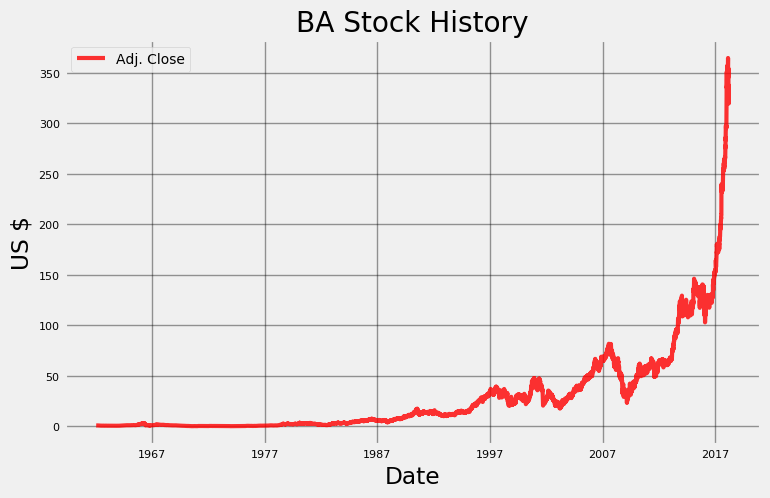

In [6]:
boeing.plot_stock()

We can also customize the graph by choosing the time range, the data we want to plot, and the type of plot. Like in this example, we want to know is `Daily Change` correlated to `Adj. Volume`, so we plot percentage change of daily change and adjusted volume between 1962-01-02 and 2018-03-23.

`plot_type` has two different values: 
1. basic - actual values
2. pct - percentage change from the average.

Well, it seems that they do not have a strong relationship in the long term.

Maximum Daily Change = 20.91 on 2018-02-06.
Minimum Daily Change = -18.34 on 2018-02-08.
Current Daily Change = -10.39 on 2018-03-27.

Maximum Adj. Volume = 44391800.00 on 2013-07-12.
Minimum Adj. Volume = 15187.50 on 1962-01-23.
Current Adj. Volume = 5296793.00 on 2018-03-27.



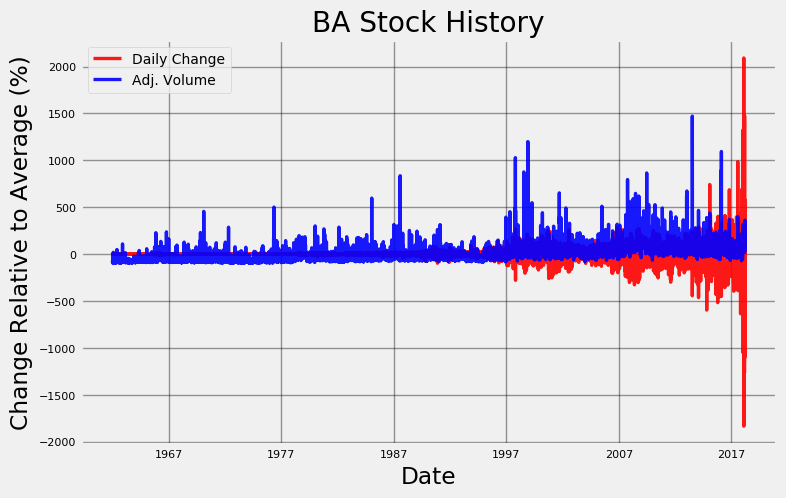

In [52]:
stat_list = ['Daily Change', 'Adj. Volume']
start_date = '1962-01-02'
end_date = '2018-03-23'
boeing.plot_stock(start_date = start_date,  end_date = end_date,  
                    stats = stat_list,  plot_type='pct')

### Plot other figures

If you want to put several stock history price in one figure, Stocker cannot do this. But you can use the stock data to plot it by yourself.

In [8]:
ebay = Stocker('EBAY')
microsoft = Stocker('MSFT')
ebay_history = ebay.stock
microsoft_history = microsoft.stock

EBAY Stocker Initialized. Data covers 1998-09-24 to 2018-03-27.
MSFT Stocker Initialized. Data covers 1986-03-13 to 2018-03-27.


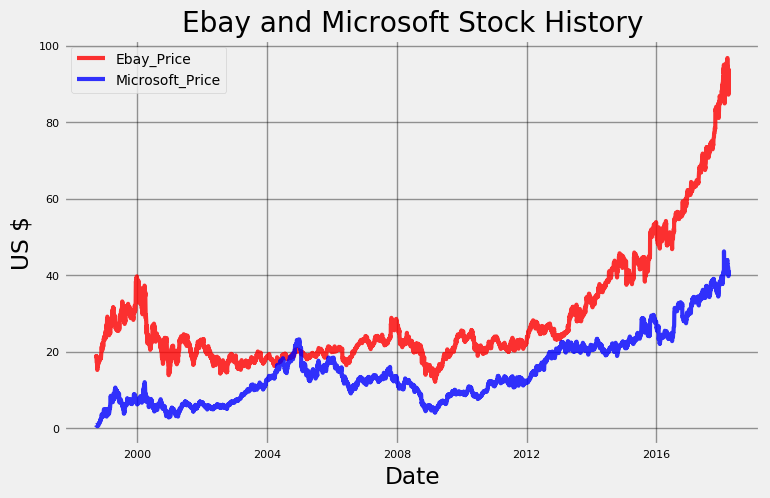

In [9]:
import matplotlib.pyplot as plt
data = ebay_history.merge(microsoft_history, how='inner', on='Date')
data.rename(columns={'Adj. Close_x': 'Microsoft_Price', 'Adj. Close_y': 'Ebay_Price'}, inplace=True)
data = data.loc[:, ['Date', 'Ebay_Price', 'Microsoft_Price']]

stats = ['Ebay_Price', 'Microsoft_Price']
colors = ['r', 'b']
for i, stat in enumerate(stats):
    plt.style.use('fivethirtyeight');
    plt.plot(data['Date'], data[stat], color = colors[i], linewidth = 3, label = stat, alpha = 0.8)
    plt.xlabel('Date'); plt.ylabel('US $'); plt.title('Ebay and Microsoft Stock History'); 
    plt.legend(prop={'size':10})
    plt.grid(color = 'k', alpha = 0.4)
plt.show()


### Potential Profit

With Stocker, you can play a `buy and hold game` to see if your strategy really works. `buy_and_hold()` will plot you how many profits you can get if you buy the stock at `start_date` and hold it until the `end_date`. In the first example, you earn $35642. However you may lose money if you buy at the wrong time, like in example 2. 

BA Total buy and hold profit from 1989-03-13 to 2018-02-27 for 100 shares = $35642.87


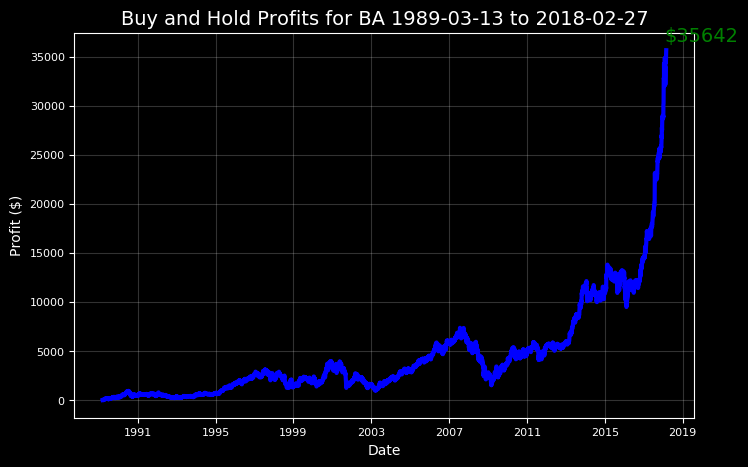

In [53]:
start_date = '1989-03-13'
end_date = '2018-02-27'
boeing.buy_and_hold(start_date=start_date, 
                    end_date=end_date, nshares=100)

BA Total buy and hold profit from 2008-03-13 to 2009-02-27 for 100 shares = $-3044.74


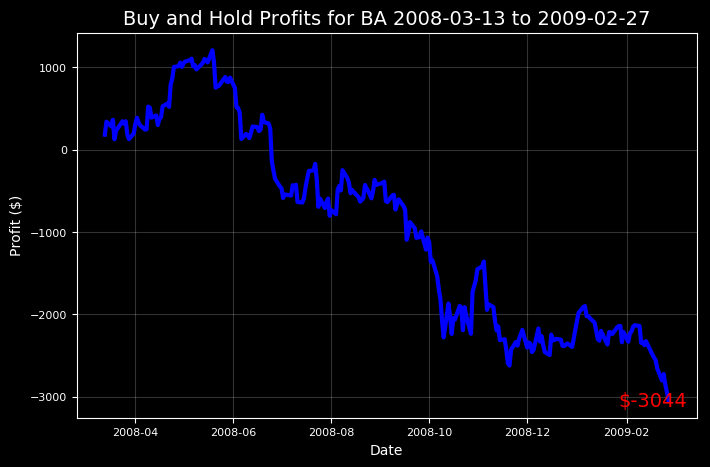

In [54]:
start_date = '2008-03-13'
end_date = '2009-02-27'
boeing.buy_and_hold(start_date=start_date, 
                    end_date=end_date, nshares=100)

### Changepoint

You may have noticed that the stock prices have some abrupt changes in their trajectories. We call these points `changepoint`. These points are pretty important for stock analysis because they may related to some significant events in the real world.

With Stocker, we can view the changepoints with `changepoint_date_analysis()` function.

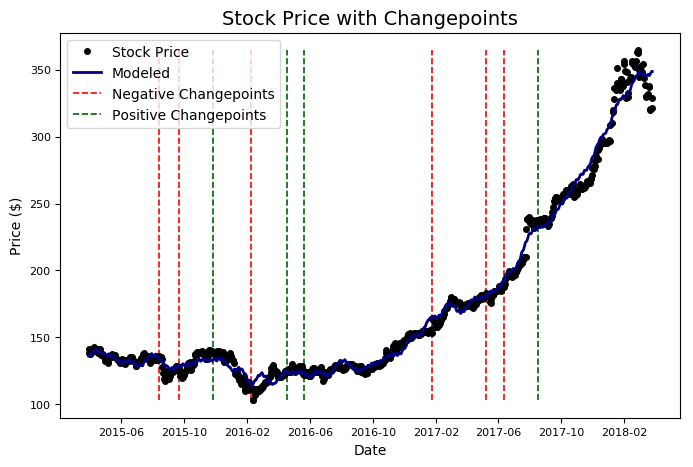

In [12]:
points = boeing.changepoint_date_analysis()

In [13]:
points

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change,yhat,delta,abs_delta
217,2016-02-08,120.67,121.33,117.2500,119.47,6451319.0,0.0,1.0,113.516141,114.137014,110.298894,112.387283,6451319.0,2016-02-08,112.387283,-1.128859,114.947596,1.980650,1.980650
169,2015-11-27,147.50,147.97,146.6800,146.95,1282131.0,0.0,1.0,138.755539,139.197675,137.984152,138.238145,1282131.0,2015-11-27,138.238145,-0.517394,133.756823,-1.577666,1.577666
531,2017-05-08,185.38,186.39,185.0000,186.02,1963400.0,0.0,1.0,181.862848,182.853686,181.490058,182.490705,1963400.0,2017-05-08,182.490705,0.627857,180.966826,0.807615,0.807615
603,2017-08-18,235.00,237.26,234.5664,235.77,2839831.0,0.0,1.0,233.736559,235.984409,233.305290,234.502419,2839831.0,2017-08-18,234.502419,0.765860,232.544743,-0.371708,0.371708
555,2017-06-12,190.30,190.53,188.0500,190.00,2727957.0,0.0,1.0,188.136708,188.364093,185.912285,187.840118,2727957.0,2017-06-12,187.840118,-0.296590,191.425026,0.365579,0.365579
458,2017-01-23,158.94,159.50,157.2900,157.84,3929835.0,0.0,1.0,154.584457,155.129111,152.979674,153.514602,3929835.0,2017-01-23,153.514602,-1.069856,165.228516,0.329355,0.329355
289,2016-05-20,129.13,129.25,127.2117,127.39,3297732.0,0.0,1.0,123.617375,123.732252,121.780968,121.951657,3297732.0,2016-05-20,121.951657,-1.665719,122.721361,-0.142003,0.142003
96,2015-08-14,144.61,145.47,143.7600,145.09,2927085.0,0.0,1.0,135.206599,136.010677,134.411871,135.655387,2927085.0,2015-08-14,135.655387,0.448788,134.833229,0.023362,0.023362
265,2016-04-18,130.64,132.25,130.3200,131.97,3056130.0,0.0,1.0,124.046292,125.575032,123.742444,125.309164,3056130.0,2016-04-18,125.309164,1.262872,123.477399,-0.014554,0.014554
121,2015-09-21,136.42,137.45,134.9400,136.02,2460863.0,0.0,1.0,127.549161,128.512185,126.165400,127.175172,2460863.0,2015-09-21,127.175172,-0.373990,128.822710,0.000591,0.000591


Stocker also offers an interesting feature that we can specify a search term in the call to changepoint_date_analysis. This is a useful function because the search frequency of some words can reflect the emotion of the society towards some specific object(like a company or one product of a company). We know emotion will affect people's decision to the stock, that's why we want to have this search feature. This feature is implemented with the help of `pytrend`. Here I will spend a little bit time to introduce the usage of `pytrend`.

In [14]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)
keywords = ['Trump']
date_range = '2017-06-21 2018-02-13'
pytrends.build_payload(keywords, cat=0, timeframe=date_range, geo='', gprop='news')
# Get search trend
trends = pytrends.interest_over_time()
print(trends.tail())

# Get related queries
related_queries = pytrends.related_queries()
print(related_queries['Trump']['top'].head())

            Trump  isPartial
date                        
2018-02-09     40      False
2018-02-10     38      False
2018-02-11     33      False
2018-02-12     38      False
2018-02-13     38      False
           query  value
0         donald    100
1   trump donald     98
2     news trump     54
3  trump twitter     31
4  melania trump     15


In our case, we can see a trend that higher search frequency of `stock` seems to result in a decrease on the stock price and vice versa. That's because high search frequency of `stock` represents a worried emotion of the society to the stock, I think.


 Top Related Queries: 

            query  value
0    stock market    100
1  stock exchange     38
2     apple stock     23
3    google stock     21
4    amazon stock     18

 Rising Related Queries: 

                   query  value
0    canopy growth stock  23200
1           aphria stock  10400
2              acb stock   7350
3  aurora cannabis stock   6950
4             gbtc stock   5600


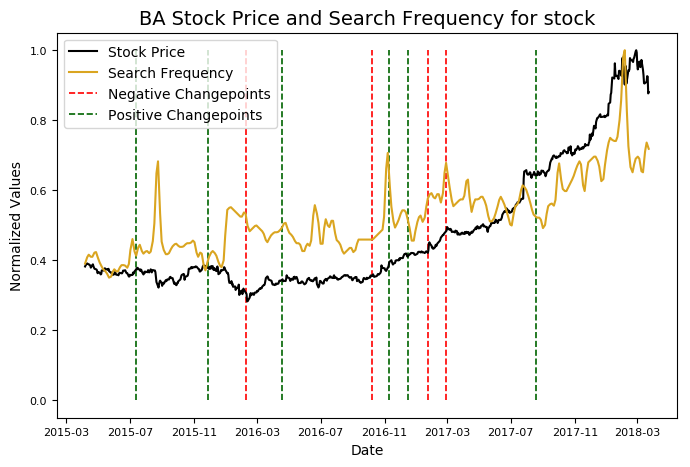

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change,yhat,delta,abs_delta
217,2016-02-08,120.67,121.3300,117.2500,119.47,6451319.0,0.0,1.0,113.516141,114.137014,110.298894,112.387283,6451319.0,2016-02-08,112.387283,-1.128859,100.549760,7.309872,7.309872
458,2017-01-23,158.94,159.5000,157.2900,157.84,3929835.0,0.0,1.0,154.584457,155.129111,152.979674,153.514602,3929835.0,2017-01-23,153.514602,-1.069856,155.353827,4.374868,4.374868
169,2015-11-27,147.50,147.9700,146.6800,146.95,1282131.0,0.0,1.0,138.755539,139.197675,137.984152,138.238145,1282131.0,2015-11-27,138.238145,-0.517394,142.491216,-4.145074,4.145074
434,2016-12-15,153.93,155.2400,153.0600,153.77,2889324.0,0.0,1.0,149.711750,150.985851,148.865591,149.556135,2889324.0,2016-12-15,149.556135,-0.155615,155.038546,-2.382100,2.382100
410,2016-11-10,146.51,149.3400,146.3900,147.69,6507346.0,0.0,1.0,142.495085,145.247533,142.378374,143.642749,6507346.0,2016-11-10,143.642749,1.147664,142.669714,-2.017652,2.017652
386,2016-10-07,133.93,134.6600,132.5400,133.85,4299180.0,0.0,1.0,129.268944,129.973538,127.927319,129.191728,4299180.0,2016-10-07,129.191728,-0.077216,126.402301,1.968084,1.968084
603,2017-08-18,235.00,237.2600,234.5664,235.77,2839831.0,0.0,1.0,233.736559,235.984409,233.305290,234.502419,2839831.0,2017-08-18,234.502419,0.765860,239.422500,-1.770461,1.770461
72,2015-07-13,145.96,146.7500,145.6001,146.62,2194245.0,0.0,1.0,135.617404,136.351426,135.283006,136.230637,2194245.0,2015-07-13,136.230637,0.613233,133.459294,-1.641964,1.641964
265,2016-04-18,130.64,132.2500,130.3200,131.97,3056130.0,0.0,1.0,124.046292,125.575032,123.742444,125.309164,3056130.0,2016-04-18,125.309164,1.262872,127.515955,-1.497192,1.497192
482,2017-02-27,178.00,179.8839,177.5500,179.43,2892459.0,0.0,1.0,174.622866,176.471024,174.181404,176.025735,2892459.0,2017-02-27,176.025735,1.402869,174.855715,1.495589,1.495589


In [42]:
search_terms = 'stock'
boeing.changepoint_date_analysis(search = search_terms)

We can also discover some rules that is counterintuitive. Like the Apple example below, we notice that the the search frequency of iphone will be pretty high when Apple announced the new vesion of iphone. However, the stock price always seems to decrease at that time. Maybe the society did not hold a positive attitude to the new products when they first apperaed.

AAPL Stocker Initialized. Data covers 1980-12-12 to 2018-03-27.

 Top Related Queries: 

          query  value
0     iphone 6s    100
1     iphone 5s     76
2  apple iphone     63
3         apple     62
4     iphone se     37

 Rising Related Queries: 

            query  value
0  iphone 6s plus  22700
1      samsung s8  16450
2      iphone 5se  16300
3   iphone 7 plus  15800
4  iphone 6s 64gb  13700


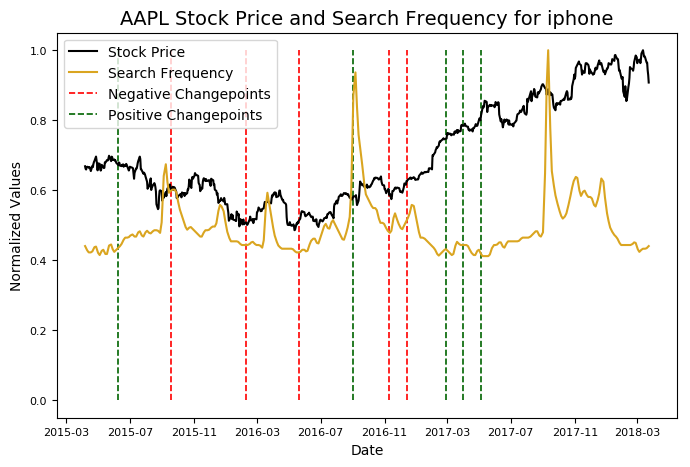

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change,yhat,delta,abs_delta
433,2016-12-14,115.04,116.200,114.98,115.19,34031834.0,0.0,1.0,113.619088,114.764760,113.559829,113.767235,34031834.0,2016-12-14,113.767235,0.148147,116.861123,1.058330,1.058330
289,2016-05-20,94.64,95.430,94.52,95.22,32025968.0,0.0,1.0,92.490497,93.262555,92.373223,93.057324,32025968.0,2016-05-20,93.057324,0.566827,97.671036,0.789450,0.789450
48,2015-06-08,128.90,129.210,126.83,127.80,52674786.0,0.0,1.0,123.445746,123.742629,121.463336,122.392291,52674786.0,2015-06-08,122.392291,-1.053455,122.554457,-0.666844,0.666844
530,2017-05-05,146.76,148.980,146.76,148.96,26787359.0,0.0,1.0,145.571223,147.773241,145.571223,147.753403,26787359.0,2017-05-05,147.753403,2.182180,144.762477,-0.429895,0.429895
482,2017-02-27,137.14,137.435,136.28,136.93,20257426.0,0.0,1.0,136.029147,136.321757,135.176113,135.820848,20257426.0,2017-02-27,135.820848,-0.208299,134.888258,-0.389543,0.389543
217,2016-02-08,93.13,95.700,93.04,95.01,54021375.0,0.0,1.0,90.461777,92.958145,90.374356,92.287914,54021375.0,2016-02-08,92.287914,1.826137,93.274687,0.316875,0.316875
506,2017-03-31,143.72,144.270,143.01,143.66,19661651.0,0.0,1.0,142.555848,143.101393,141.851599,142.496334,19661651.0,2017-03-31,142.496334,-0.059514,142.735734,-0.178659,0.178659
361,2016-09-01,106.14,106.800,105.62,106.73,26701523.0,0.0,1.0,104.287779,104.936262,103.776854,104.867483,26701523.0,2016-09-01,104.867483,0.579704,103.772093,-0.109939,0.109939
409,2016-11-09,109.88,111.320,108.05,110.88,59176361.0,0.0,1.0,108.522821,109.945035,106.715425,109.510470,59176361.0,2016-11-09,109.510470,0.987649,114.702037,0.082123,0.082123
120,2015-09-18,112.21,114.300,111.87,113.45,74285291.0,0.0,1.0,107.947331,109.957935,107.620247,109.140225,74285291.0,2015-09-18,109.140225,1.192894,111.061144,0.042031,0.042031


In [41]:
apple = Stocker('AAPL')
search_terms = 'iphone'
apple.changepoint_date_analysis(search = search_terms)

## Stock Price Prediction

### Prophet Model

Prophet is a forecasting tool developed by facebook which leverages additive regression model. We can find the instruction here (https://research.fb.com/prophet-forecasting-at-scale/).

Stocker simplifies the usage of  prophet model. We just need to call `create_prophet_model()` and we can get the result. We can use Prophet both to see the trends and the do the prediction.

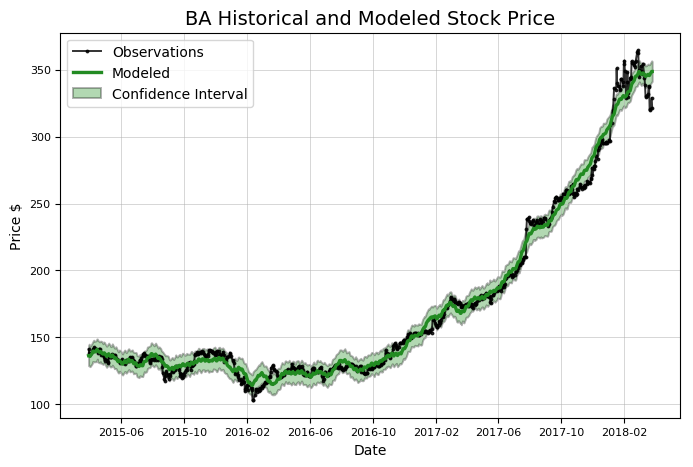

In [18]:
model, data = boeing.create_prophet_model()

In [19]:
data.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,monthly,monthly_lower,monthly_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
0,2015-03-30,131.951516,131.951516,131.951516,128.724246,143.726601,0.948031,0.948031,0.948031,4.362682,4.362682,4.362682,4.362682,4.362682,4.362682,3.414651,3.414651,3.414651,136.314198
1,2015-03-31,131.983053,131.983053,131.983053,128.786464,144.882505,0.652624,0.652624,0.652624,4.427025,4.427025,4.427025,4.427025,4.427025,4.427025,3.774401,3.774401,3.774401,136.410078
2,2015-04-01,132.014590,132.014590,132.014590,128.352939,144.228383,-0.055703,-0.055703,-0.055703,4.099503,4.099503,4.099503,4.099503,4.099503,4.099503,4.155206,4.155206,4.155206,136.114094
3,2015-04-02,132.046128,132.046128,132.046128,128.027495,143.159067,-0.834228,-0.834228,-0.834228,3.712526,3.712526,3.712526,3.712526,3.712526,3.712526,4.546754,4.546754,4.546754,135.758654
4,2015-04-06,132.172277,132.172277,132.172277,130.319576,145.696401,-0.017815,-0.017815,-0.017815,6.009328,6.009328,6.009328,6.009328,6.009328,6.009328,6.027143,6.027143,6.027143,138.181605


We can use the returned `model` and `data` object to dig into the data, in other words, we can observe the data from different time-series perspective. Here we need to import matplotlib.pyplot.

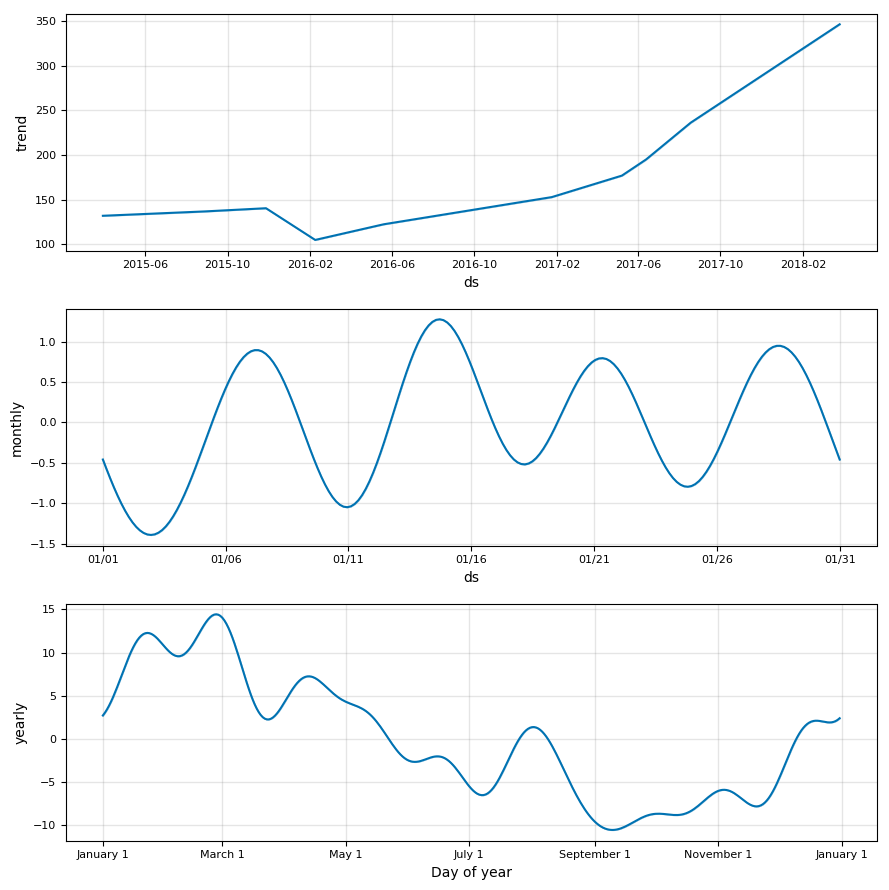

In [20]:
model.plot_components(data)
plt.show()

Here we observe the data from three different perspective. If you think the stock price has some weekly rules, we can set `weekly_seasonality = True` and plot the figers again.

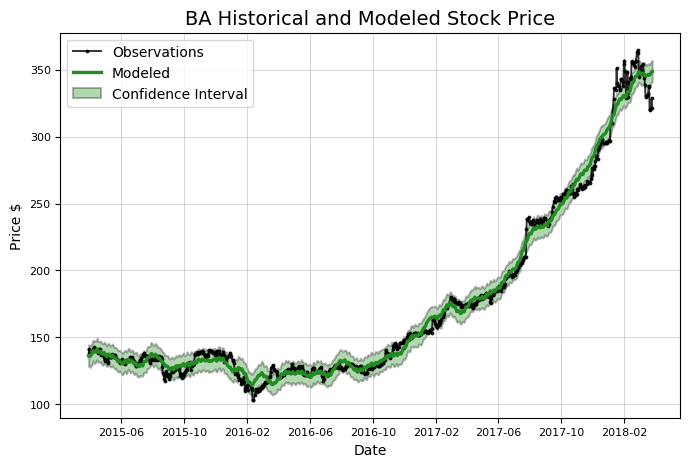

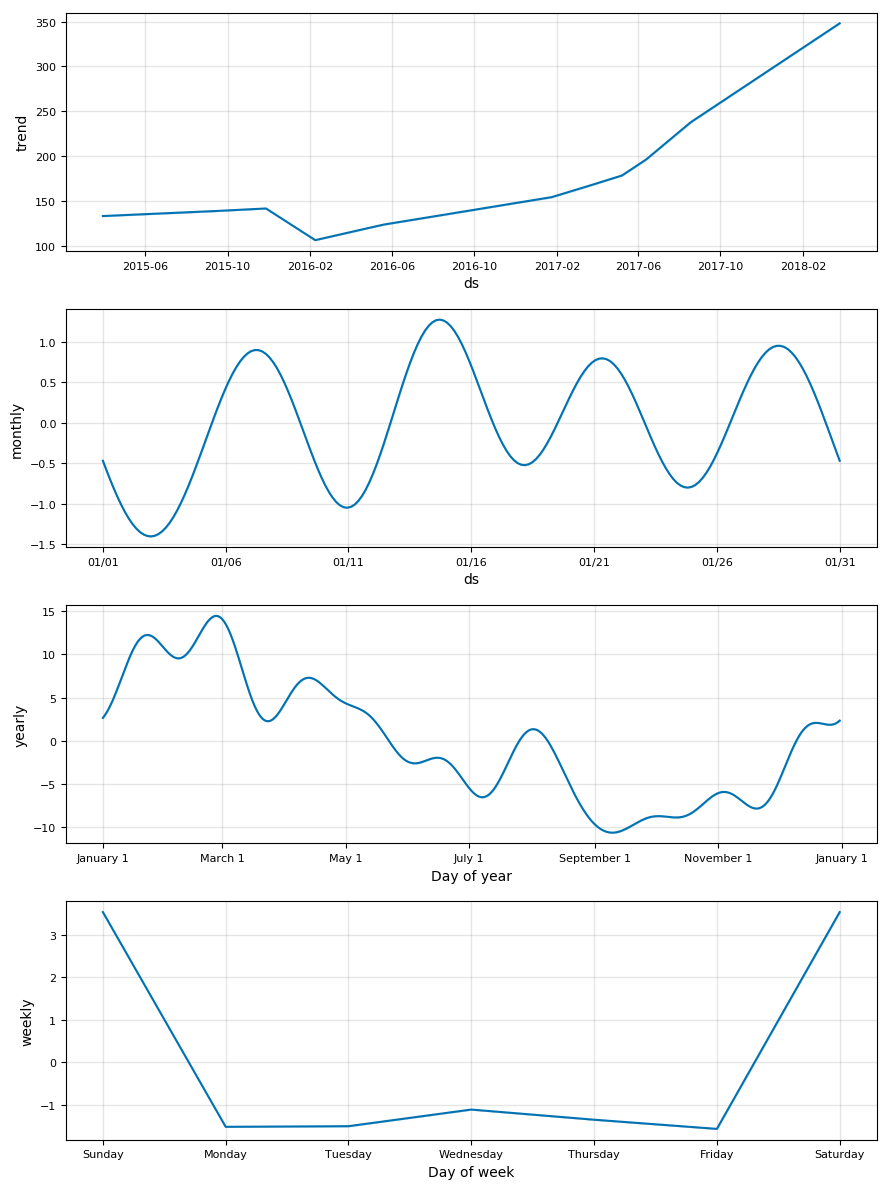

In [21]:
boeing.weekly_seasonality = True
model, data = boeing.create_prophet_model()
model.plot_components(data)
plt.show()

We can just ignore Sunday and Saturday because there is no trading at weekends. During weekdays, it almost has no trends, or we can say the difference is really small. So we can just turn off the weekly_seasonality.

In [23]:
boeing.weekly_seasonality = False

Prophet is a prediction model, so we can use it no only for observing trends, but also do the prediction. We can do this simply by change the parameter `days` of `create_prophet_model()`.

Predicted Price on 2018-05-26 = $375.57


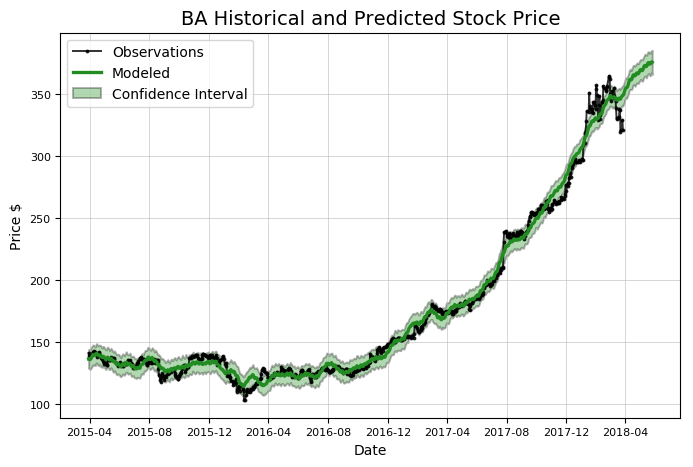

In [24]:
model, data = boeing.create_prophet_model(days=60)

We can get some results like changepoints from model and we can use `data[-days:]` to check the details of the prediction.

In [48]:
print(model.changepoints.head())
data[-10:]

24    2015-05-04
48    2015-06-08
72    2015-07-13
96    2015-08-14
121   2015-09-21
Name: ds, dtype: datetime64[ns]


,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,monthly,monthly_lower,monthly_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
804,2018-05-17,371.980236,368.690448,375.169557,366.007188,383.964221,0.952615,0.952615,0.952615,2.786513,2.786513,2.786513,2.786513,2.786513,2.786513,1.833898,1.833898,1.833898,374.766749
805,2018-05-18,372.479232,369.077665,375.818676,366.431255,383.923459,1.273384,1.273384,1.273384,2.793880,2.793880,2.793880,2.793880,2.793880,2.793880,1.520495,1.520495,1.520495,375.273112
806,2018-05-19,372.978228,369.458027,376.477801,366.459162,384.039097,0.879411,0.879411,0.879411,2.070259,2.070259,2.070259,2.070259,2.070259,2.070259,1.190848,1.190848,1.190848,375.048487
807,2018-05-20,373.477224,369.849908,377.087238,365.305282,383.863791,0.107196,0.107196,0.107196,0.956029,0.956029,0.956029,0.956029,0.956029,0.956029,0.848833,0.848833,0.848833,374.433253
808,2018-05-21,373.976220,370.242182,377.645595,365.037232,382.701737,-0.455884,-0.455884,-0.455884,0.042995,0.042995,0.042995,0.042995,0.042995,0.042995,0.498879,0.498879,0.498879,374.019216
809,2018-05-22,374.475217,370.609271,378.302731,364.521121,383.289988,-0.421233,-0.421233,-0.421233,-0.275399,-0.275399,-0.275399,-0.275399,-0.275399,-0.275399,0.145834,0.145834,0.145834,374.199817
810,2018-05-23,374.974213,371.043124,378.879167,366.388301,383.768083,0.114221,0.114221,0.114221,-0.090954,-0.090954,-0.090954,-0.090954,-0.090954,-0.090954,-0.205175,-0.205175,-0.205175,374.883259
811,2018-05-24,375.473209,371.402318,379.508812,366.096250,384.600836,0.666188,0.666188,0.666188,0.117293,0.117293,0.117293,0.117293,0.117293,0.117293,-0.548894,-0.548894,-0.548894,375.590502
812,2018-05-25,375.972205,371.817531,380.159902,367.262459,385.001474,0.757942,0.757942,0.757942,-0.122162,-0.122162,-0.122162,-0.122162,-0.122162,-0.122162,-0.880104,-0.880104,-0.880104,375.850043
813,2018-05-26,376.471201,372.235919,380.804372,365.617024,385.263034,0.291696,0.291696,0.291696,-0.902081,-0.902081,-0.902081,-0.902081,-0.902081,-0.902081,-1.193777,-1.193777,-1.193777,375.569120


### Evaluate Model

Evaluation is necessary for a prediction model. We need to know our prediction is good or bad. Stocker's strategy is that it uses the past-year data as testing data and data from 3 years prior to the test year as training data.


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $235.58.
Actual price on    2018-03-23 = $321.00.

Average Absolute Error on Training Data = $2.64.
Average Absolute Error on Testing  Data = $57.98.

When the model predicted an increase, the price increased 60.69% of the time.
When the model predicted a  decrease, the price decreased  42.11% of the time.

The actual value was within the 80% confidence interval 19.20% of the time.


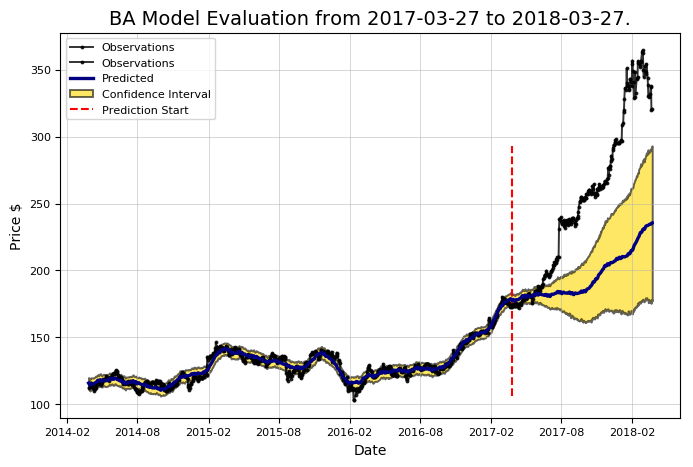

In [26]:
boeing.evaluate_prediction()

As we can see, the prediction is not very good. That's because the default settings of Prophet Model do not fit our problem. We can do some changes to it and predict again.

### Changepoint Prior Scale Selection

We have mentions changepoints before, they occur at the places with the greatest change in the rate of the time series. Here we have a new concept, changepoint prior scale. Changepoint prior scale represents the weight of the changepoints in the model. This is used to solve the overfitting and underfitting problem.

We have two ways to select an appropriate prior scale, graphical way and quantitative way. We can do this by calling `changepoint_prior_analysis()` and `changepoint_prior_validation()`

#### Graphical way 

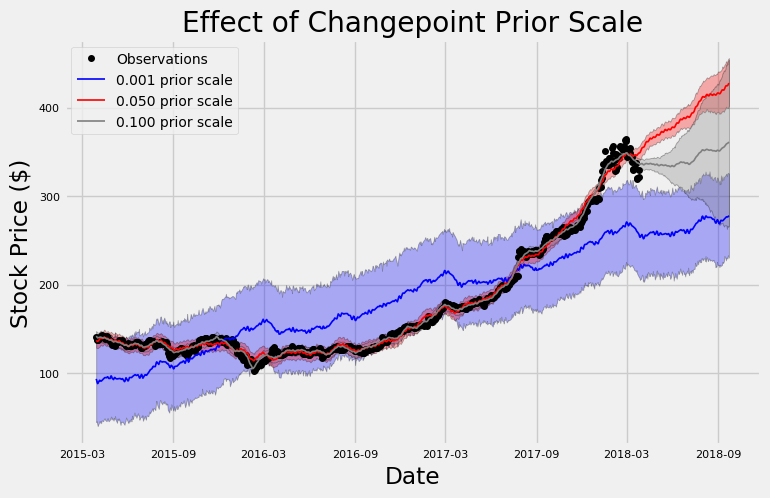

In [43]:
chosen_priors = [0.001, 0.05, 0.1]
boeing.changepoint_prior_analysis(changepoint_priors = chosen_priors)

#### Quantitative way


Validation Range 2017-03-06 to 2018-03-02.

     cps  train_err  train_range   test_err  test_range
0  0.001   7.736612    26.900465  95.145605   26.890124
1  0.050   2.614174     8.614230  45.558583   54.473389
2  0.100   2.307143     7.474208  39.086943   94.886897


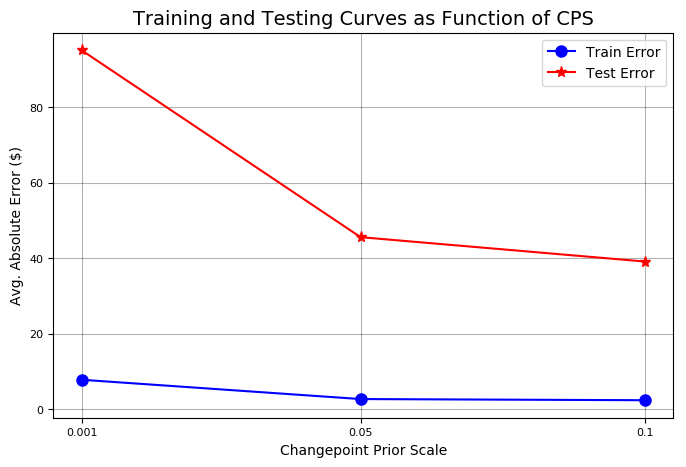

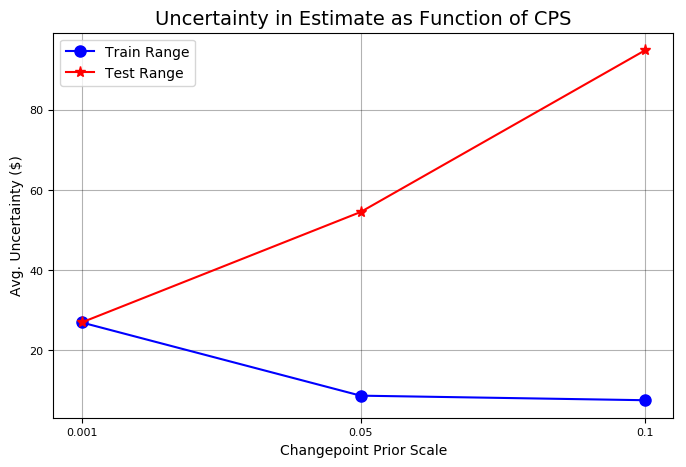

In [55]:
start_date = '2017-03-04'
end_date = '2018-03-03'
boeing.changepoint_prior_validation(start_date=start_date, end_date=end_date, 
                                    changepoint_priors=[0.001, 0.05, 0.1])

From the graphs above, we can see that the test error decreases while we increasing the scale. With the two tools introduced above, we can start to improve our model. We try several scales, it seems that 0.5 is good. So we change the `changepoint_prior_scale` as 0.5, and turn off `weekly_seasonality` first and get the evaluation result. Then we turn on `weekly_seasonality` and get the corresponding result. It's clear that `weekly_seasonality` does not affect the result, so we just change it back to `False` again.


Validation Range 2017-03-06 to 2018-03-02.

   cps  train_err  train_range   test_err  test_range
0  0.1   2.307143     7.486509  39.086943   90.209254
1  0.3   1.954415     6.328158  30.852196  181.623438
2  0.5   1.906577     6.202774  28.998955  216.758227
3  0.7   1.895467     6.181042  29.650565  217.326665
4  0.8   1.903464     6.187067  31.159751  214.429200


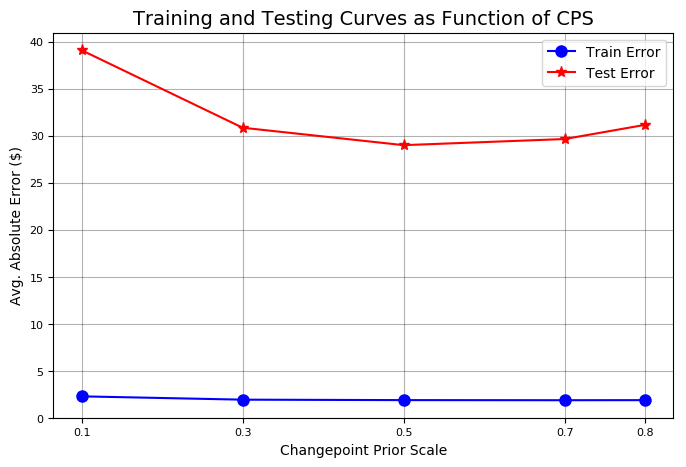

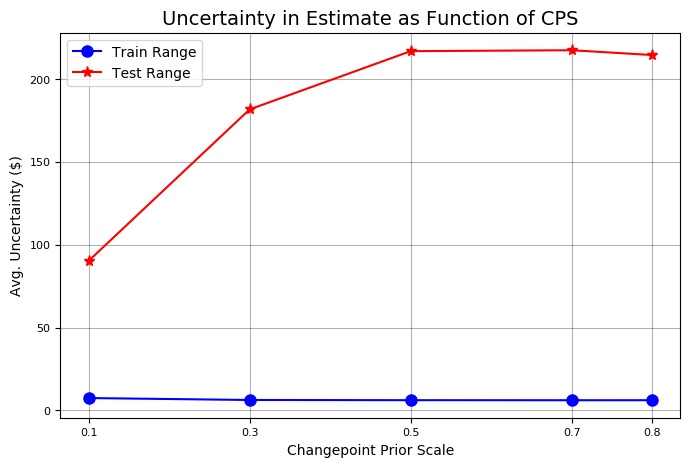

In [50]:
chosen_priors = [0.1, 0.3, 0.5, 0.7, 0.8]
start_date = '2017-03-04'
end_date = '2018-03-03'
boeing.changepoint_prior_validation(start_date=start_date, end_date=end_date, 
                                    changepoint_priors = chosen_priors)


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $196.35.
Actual price on    2018-03-23 = $321.00.

Average Absolute Error on Training Data = $1.82.
Average Absolute Error on Testing  Data = $88.10.

When the model predicted an increase, the price increased 61.15% of the time.
When the model predicted a  decrease, the price decreased  41.82% of the time.

The actual value was within the 80% confidence interval 48.40% of the time.


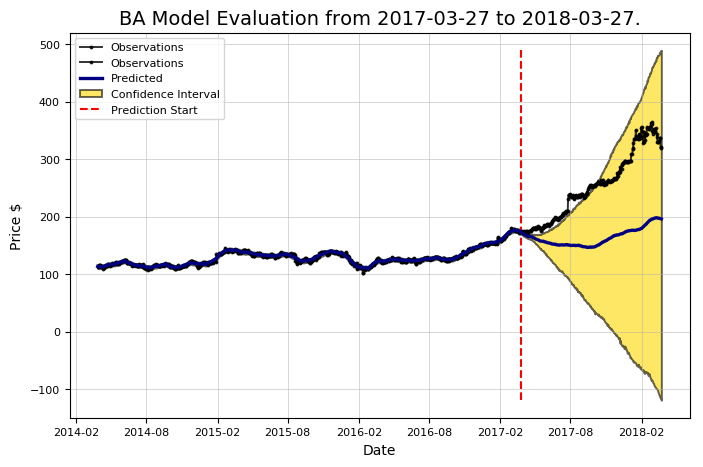

In [30]:
boeing.changepoint_prior_scale = 0.5
boeing.weekly_seasonality=False
boeing.evaluate_prediction()


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $200.33.
Actual price on    2018-03-23 = $321.00.

Average Absolute Error on Training Data = $1.82.
Average Absolute Error on Testing  Data = $90.88.

When the model predicted an increase, the price increased 63.20% of the time.
When the model predicted a  decrease, the price decreased  43.55% of the time.

The actual value was within the 80% confidence interval 53.60% of the time.


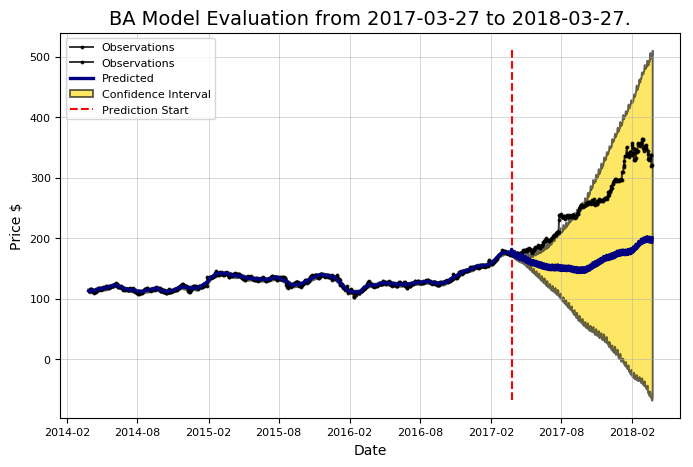

In [31]:
boeing.weekly_seasonality=True
boeing.evaluate_prediction()

We cannot observe significant improvement with `weekly_seasonality`, so we can just set it back to `False` again.

In [32]:
boeing.weekly_seasonality=False

### Playing with our prediction model

We can see the prediction result with `evaluate_prediction` and specify a value to `nshares` as a parameter. Result will tell us the correctness of the trend prediction. Like in the example below, our model successfully predicts 61.15% of increasement and 41.82% of decreasement.

You played the stock market in BA from 2017-03-27 to 2018-03-27 with 1000 shares.

When the model predicted an increase, the price increased 61.15% of the time.
When the model predicted a  decrease, the price decreased  41.82% of the time.

The total profit using the Prophet model = $80288.19.
The Buy and Hold strategy profit =         $148241.09.

Thanks for playing the stock market!



/Users/youx/Documents/Data Science/Tutorial/stocker/stocker.py:614: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


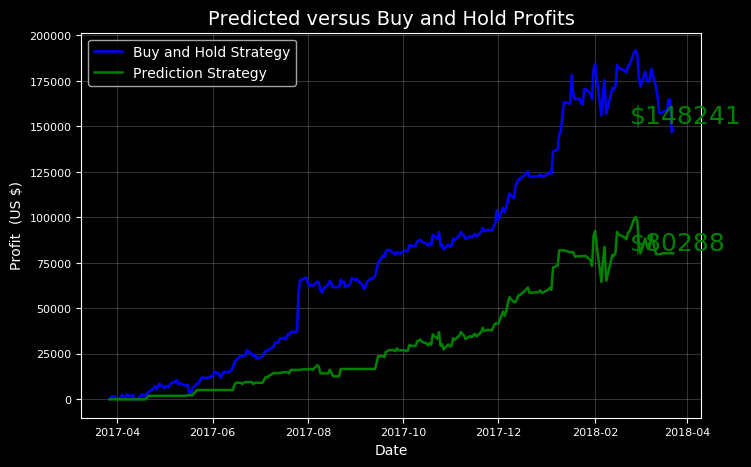

In [33]:
boeing.evaluate_prediction(nshares=1000)

We can also plot figures for a different time interval just by specify the `start_date` and `end_date` parameters.

You played the stock market in BA from 2016-03-23 to 2017-03-23 with 1000 shares.

When the model predicted an increase, the price increased 53.19% of the time.
When the model predicted a  decrease, the price decreased  40.00% of the time.

The total profit using the Prophet model = $16293.84.
The Buy and Hold strategy profit =         $47467.97.

Thanks for playing the stock market!



/Users/youx/Documents/Data Science/Tutorial/stocker/stocker.py:614: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


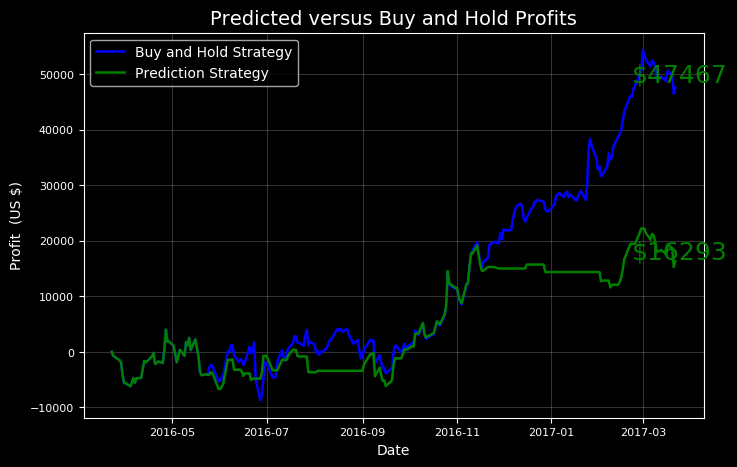

In [51]:
start_date = '2016-03-23'
end_date = '2017-03-23'
boeing.evaluate_prediction(start_date=start_date, 
                           end_date=end_date , nshares=1000)

### Using refined model to predict future price

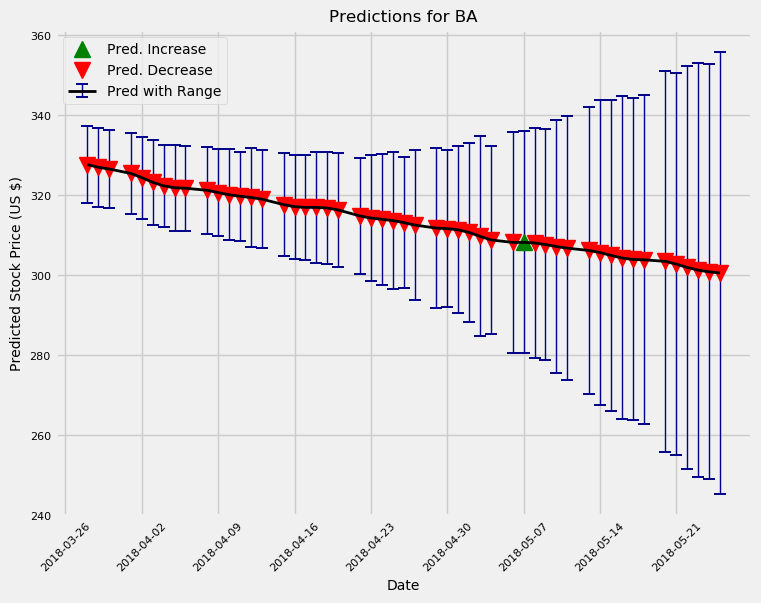

In [35]:
result = boeing.predict_future(days=60)

In [47]:
print(result.columns)
result.head()

Index(['Date', 'trend', 'trend_lower', 'trend_upper', 'lower', 'upper',
       'monthly', 'monthly_lower', 'monthly_upper', 'seasonal',
       'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'estimate', 'change', 'direction'],
      dtype='object')


,Date,trend,trend_lower,trend_upper,lower,upper,monthly,monthly_lower,monthly_upper,seasonal,...,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,estimate,change,direction
1,2018-03-28,304.090833,304.090833,304.090833,322.710408,332.412374,0.039694,0.039694,0.039694,23.578934,...,23.578934,23.578934,23.578934,23.578934,23.539240,23.539240,23.539240,327.669767,-0.909255,0
2,2018-03-29,304.274905,304.274905,304.274905,322.137931,332.060325,0.033694,0.033694,0.033694,22.715001,...,22.715001,22.715001,22.715001,22.715001,22.681307,22.681307,22.681307,326.989906,-0.679861,0
3,2018-03-30,304.458976,304.458976,304.458976,321.521326,331.316062,0.246138,0.246138,0.246138,22.101616,...,22.101616,22.101616,22.101616,22.101616,21.855478,21.855478,21.855478,326.560592,-0.429313,0
5,2018-04-01,304.827120,304.827120,304.827120,320.137709,330.251110,0.335709,0.335709,0.335709,20.623515,...,20.623515,20.623515,20.623515,20.623515,20.287806,20.287806,20.287806,325.450635,-1.109957,0
6,2018-04-02,305.011192,305.011192,305.011192,319.470035,329.708131,-0.149071,-0.149071,-0.149071,19.390038,...,19.390038,19.390038,19.390038,19.390038,19.539108,19.539108,19.539108,324.401230,-1.049405,0


We can use `direction` attribute to determine it is an increasement or a decreasement. 1 stands for increasement and 0 stands for decreasement. We can use this to check the details of increasement/decreasement prediction details.

In [36]:
future_increase = result[result['direction'] == 1]
future_decrease = result[result['direction'] == 0]

In [37]:
future_increase

,Date,trend,trend_lower,trend_upper,lower,upper,monthly,monthly_lower,monthly_upper,seasonal,...,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,estimate,change,direction
41,2018-05-07,311.453707,297.191299,324.165784,293.137373,320.907035,-0.490293,-0.490293,-0.490293,-3.228952,...,-3.228952,-3.228952,-3.228952,-3.228952,-2.738659,-2.738659,-2.738659,308.224755,0.023884,1


In [39]:
future_decrease.tail()

,Date,trend,trend_lower,trend_upper,lower,upper,monthly,monthly_lower,monthly_upper,seasonal,...,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,estimate,change,direction
55,2018-05-21,314.030713,289.283567,335.921895,276.757794,324.559912,0.729339,0.729339,0.729339,-11.250698,...,-11.250698,-11.250698,-11.250698,-11.250698,-11.980036,-11.980036,-11.980036,302.780015,-0.687774,0
56,2018-05-22,314.214785,288.788501,336.575307,275.466003,325.887578,0.401632,0.401632,0.401632,-12.261419,...,-12.261419,-12.261419,-12.261419,-12.261419,-12.663051,-12.663051,-12.663051,301.953366,-0.826650,0
57,2018-05-23,314.398857,288.058629,337.484172,273.348949,325.091902,0.209161,0.209161,0.209161,-13.121299,...,-13.121299,-13.121299,-13.121299,-13.121299,-13.330460,-13.330460,-13.330460,301.277558,-0.675808,0
58,2018-05-24,314.582928,287.525648,338.391277,273.272946,325.105968,0.258426,0.258426,0.258426,-13.719717,...,-13.719717,-13.719717,-13.719717,-13.719717,-13.978143,-13.978143,-13.978143,300.863211,-0.414347,0
59,2018-05-25,314.767000,286.875728,339.461342,270.953776,326.164788,0.402924,0.402924,0.402924,-14.199296,...,-14.199296,-14.199296,-14.199296,-14.199296,-14.602220,-14.602220,-14.602220,300.567704,-0.295507,0
